<a href="https://colab.research.google.com/github/engronaldmanoel/Analise_de_Crimes_no_Rio_de_Janeiro/blob/main/%5BCompleto%5D_Analise_de_Crimes_em_Rio_de_Janeiro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANALISE DA VIOLÊNCIA NO RIO DE JANEIRO:
*A criminalidade é uma questão que preocupa os
cidadãos e os governos de qualquer país, uma vez que
afeta drasticamente o bem-estar da população por
meio de perdas de patrimônio e/ou por causar risco
à integridade física dos indivíduos. Nesse sentido,
os crimes impõem uma série de custos à sociedade.
De acordo com Cerqueira e Bueno (2019) os custos
da criminalidade geraram uma perda de 373 bilhões
de reais para Brasil em 2016 (5,9% do PIB).1 Além
disso, a criminalidade afeta a atividade turística e a
entrada de novos investimentos e provoca a expulsão
do investimento existente.* (Texto retirado do artigo [Criminalidade na cidade do rio de janeiro](https://www.scielo.br/j/rbcsoc/a/P8NPDMrGjMyJDKMRz8WHRvK/))



Ocorre com muita frequência sermos guiados pelo senso comum, Preconcebendo opiniões sobre diversos assuntos, baseado em conversas e informações compartilhadas de maneira informal. sendo assim é quase que certo que esse senso comum se aplica à alguns locais do Brasil.



Ah alguns estados sendo ligados a cultura, costumes e até mesmo nível de urbanização. no entanto o senso comum costuma **tirar conclusões equivocadas** na maioria das vezes. 


E podemos testar- no **Estado do Rio de Janeiro**, ao perguntar para uma pessoa qualquer,  ***oque você pensa sobre o rio de janeiro?***  a resposta pode variar dependendo de uma série de caracteristicas e ocasiões no entanto algumas respostas podem ser: Cristo Redentor, Pão de açucar, Violência, Morros, Tráfico, Favela. Por mas que seja um dos principais Estados do Brasil o Rio de Janeiro passa essa insegurança, sendo um dos motivos as informações ruins que são vinculadas e compartilhadas que sobressaem sobre as demais

Mas essa criminalidade é verdade?

que tal utilizar dados para responder!





# Obtenção dos dados
> Através de uma Analise Exploratória iremos verificar através de um **dataset **entender um pouco mais sobre a criminalidade no Rio de Janeiro os dados foram retirados do  [ portal ISPDados](http://www.ispdados.rj.gov.br/) Sendo o acesso público

>> DICIONÁRIO DE ALGUMAS VARIÁVEIS
* `ano` — Ano da comunicação da ocorrência
* `hom_doloso` — Registros de Homicídio Doloso
* `lesao_corp_morte` — Registros de Lesão Corporal com Morte
* `latrocinio` — Registros de Latrocínio
* `hom_por_interv_policial` — Registros de Homicídios por Intervenção Policial
* `letalidade_violenta` — inclui os casos de homicídio doloso, latrocínio lesão corporal seguida de morte e morte por intervenção de agente do Estado
* `tentat_hom` — Tentativas de Homicídios
lesao_corp_dolosa — Lesão Corporal Dolosa
* `estupro` — Casos de Estupros
* `roubo_veiculo` — Roubos de Veículos
* `roubo_em_coletivo` — Roubos em Coletivo
* `furto_veiculos` — Furto de Veículos
* `recuperacao_veiculos` — Recuperação de veículos roubados ou furtados
* `apf` — Auto de Prisão em Flagrante

> Eu optei por utilizar um intervalo de tempo de 2014 a 2019 já que são valores mais recentes

In [ ]:
#Faremos a importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

crimes_rio = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

crimes_rio.head()

vano  mes  hom_doloso  ...  indicador_roubo_veic  registro_ocorrencias  fase
0  1991    1         657  ...                  1174                   NaN     3
1  1991    2         732  ...                  1097                   NaN     3
2  1991    3         713  ...                  1265                   NaN     3
3  1991    4         634  ...                  1415                   NaN     3
4  1991    5         650  ...                  1449                   NaN     3

[5 rows x 56 columns]

In [ ]:
crimes_rio.shape

(344, 56)

> Aqui temos as dimensões do dataset:
* Entradas: `344`
* Variáveis: `56`



---



In [ ]:
crimes_rio.columns # Vamos verificar as "colunas"/ Variaveis do dataset

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Abaixo Encontramos valores Estartísticos sobre o dataset geral

In [ ]:
crimes_rio.describe()

vano         mes  ...  registro_ocorrencias        fase
count   344.000000  344.000000  ...            248.000000  344.000000
mean   2004.837209    6.453488  ...          53794.161290    2.994186
std       8.289036    3.447759  ...          11039.051992    0.076138
min    1991.000000    1.000000  ...          30621.000000    2.000000
25%    1998.000000    3.000000  ...          45374.500000    3.000000
50%    2005.000000    6.000000  ...          54926.500000    3.000000
75%    2012.000000    9.000000  ...          63292.500000    3.000000
max    2019.000000   12.000000  ...          75403.000000    3.000000

[8 rows x 56 columns]

> Logo no método `head()` que usamos para verificar as primeiras 5 entradas do nosso dataset, já podemos observar dados ausentes. Vamos analisar isso pois eles podem prejudicar bastante a nossa análise

In [ ]:
crimes_rio.isnull().sum() / crimes_rio.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

>Podemos verificar que possuimos bastantes variáveis com valores ausentes, por exemplo `roubo_bicicleta` , `furto_bicicleta`  
>>**Posssui 80% dos valores ausentes!** 






---



>Em Seguida iremos deletar os valores ausentes, eu optei essa forma de lidar com esses valores pois existe valores ausentes em um periodo bastante extenso


*   Não optei pela média (Por não se enquadra na análise)
*   Não substituir pelo valor mais frequente (Pode haver equivocos)

*Abaixo isso fará sentido!* **Nas Análises**



In [ ]:
crimes_rio = crimes_rio.dropna()

crimes_rio.isnull().sum() / crimes_rio.shape[0]

vano                          0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
hom_por_interv_policial       0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_transeunte              0.0
roubo_em_coletivo             0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_celular                 0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeunte              0.0
furto_coletivo                0.0
furto_celular                 0.0
furto_biciclet

## Correlações


1.   Criar Matriz de Correlação
2.   Verificar se alguma Correlação Forte entre as Variáveis
3.   Elaborar Hipoteses





In [ ]:
corr = crimes_rio[['apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor']].corr()

display(corr)  

apreensao_drogas  ...  apreensao_drogas_sem_autor
apreensao_drogas                    1.000000  ...                    0.802807
posse_drogas                        0.930060  ...                    0.771346
trafico_drogas                      0.705034  ...                    0.400210
apreensao_drogas_sem_autor          0.802807  ...                    1.000000

[4 rows x 4 columns]

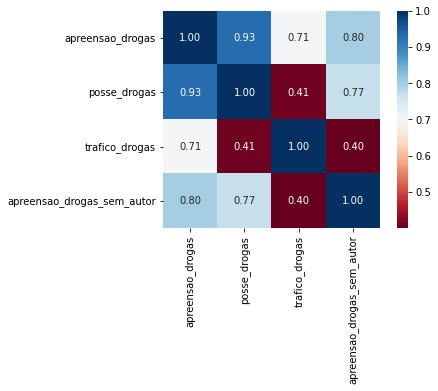

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Nesse Dataset na primeira amostragem das variaveis podemos enxergar correlações fortes com valores: 0.93 e 0,80

# Apreensão de Drogas

Nas colunas verificamos que existem duas variaveis `apreensao_drogas` e `apreensao_drogas_sem_autor` disponibilizando as seguintes informações: Número de apreensão de drogas mensais e quais não possuem autor.

In [ ]:
np.corrcoef(crimes_rio["apreensao_drogas"], crimes_rio["apreensao_drogas_sem_autor"])        

array([[1.        , 0.80280652],
       [0.80280652, 1.        ]])

Com o numpy confirmamos que as variáveis possuem 80% de correção

>Sendo assim vamos verificar um gráfico que mostra a similiaridade entre as apreensões

PODEMOS PLOTAR UM GRÁFICO PARA VISUALIZAR ESSA DISTRIBUIÇÃO DE DADOS

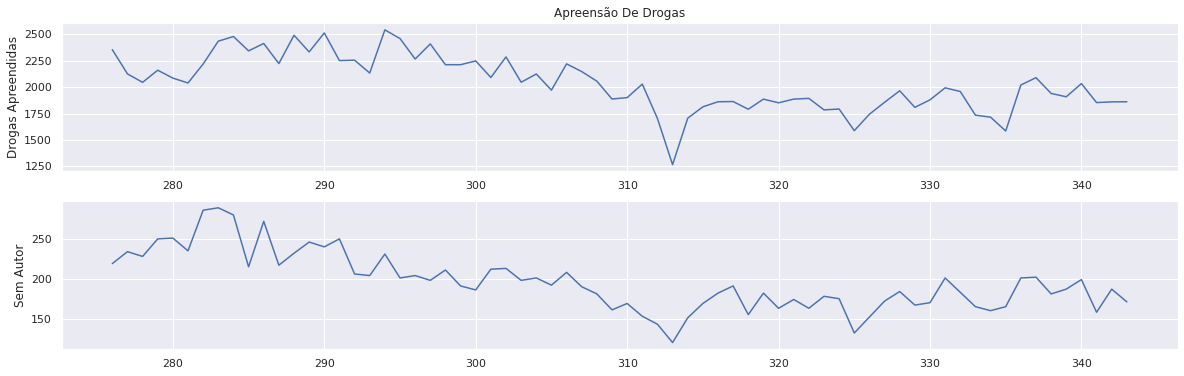

In [ ]:
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1,figsize=(20,6))
sns.set()
crimes_rio.loc[:, 'apreensao_drogas'].plot(kind='line', ax=ax)
ax.set_title('Apreensão De Drogas')
ax.set_ylabel('Drogas Apreendidas')


crimes_rio.loc[:, 'apreensao_drogas_sem_autor'].plot(kind='line', ax=ax1)
ax1.set_ylabel('Sem Autor')

plt.tight_layout;

> Observando o gráfico eles ***são quase*** idênticos possui uma leve suavilização no segundo confirmando a correlação 

In [ ]:
# Média de Apreensão de Drogas sem Autor
mean_apreensao_sem_autor = crimes_rio['apreensao_drogas_sem_autor'].mean()
print(mean_apreensao_sem_autor)

196.13235294117646


In [ ]:
# Média de Apreensão de Drogas
mean_apreensao = crimes_rio['apreensao_drogas'].mean()
print(mean_apreensao)

2037.4705882352941


In [ ]:
porcentual = (mean_apreensao_sem_autor / mean_apreensao) * 100


print(f'A porcentagem de Drogas sem autor é de: {porcentual}' )

A porcentagem de Drogas sem autor é de: 9.626266709010595


### Com isso Concluimos que: 

* Com isso conseguimos concluir que nas operações policiais cerca de 91% das vezes é possivel identificar o autor das drogas






# Homicidios por Intervenção Policial

Nesse tópico vamos fazer uma breve análise nos homicidios por intervenção policial


> PRINCIPAL OBJETIVO
*   Verificar se possui alguma correlação forte no número casos
*   Verificar se à aumento no número de casos com o decorrer dos anos




In [ ]:
corr1 = crimes_rio[['pol_militares_mortos_serv', 'pol_civis_mortos_serv', 'hom_por_interv_policial', 'mes',
                    'vano']].corr()

display(corr1)

pol_militares_mortos_serv  ...      vano
pol_militares_mortos_serv                   1.000000  ...  0.085734
pol_civis_mortos_serv                       0.024240  ...  0.123445
hom_por_interv_policial                     0.020000  ...  0.880375
mes                                        -0.048754  ... -0.111566
vano                                        0.085734  ...  1.000000

[5 rows x 5 columns]

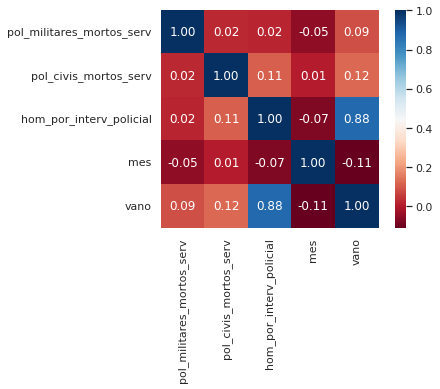

In [ ]:
sns.heatmap(corr1, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Na Matriz de correlação deu uma forte ligação com os anos por esse motivo vamos plotar o gráfico para analisar melhor a situação

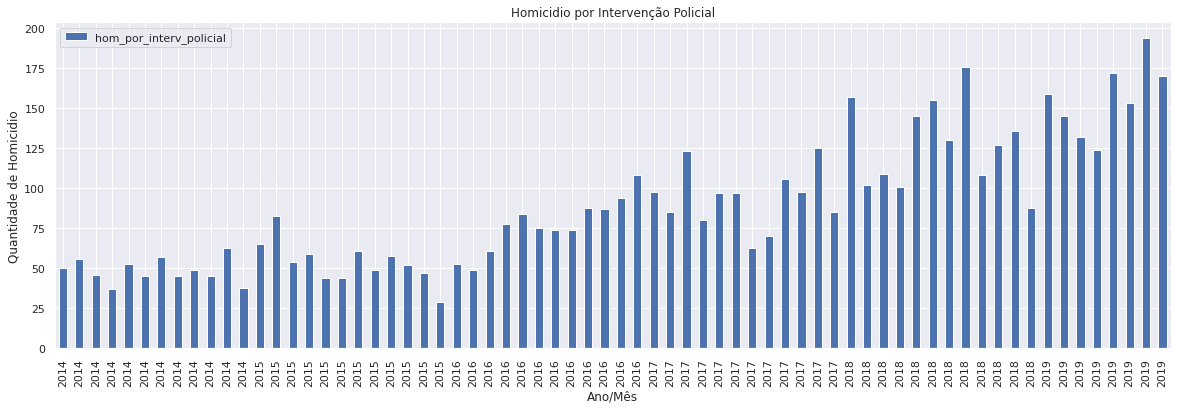

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.set()
crimes_rio.plot(x = 'vano', y='hom_por_interv_policial', kind='bar', ax=ax)
ax.set_title('Homicidio por Intervenção Policial')
ax.set_ylabel('Quantidade de Homicidio')
ax.set_xlabel('Ano/Mês')


plt.tight_layout;

>Podemos verificar que o número de casos aumentou com o decorrer dos anos, não de forma linear mas crescente.

# Pessoas Desaparecidas é possivel neutralizar?

> * Existe alguma variavel que influência no número de pessoas desaparecidas?
> * Se sim como poderiamos trabalhar para diminuição de pessoas desaparecidas?





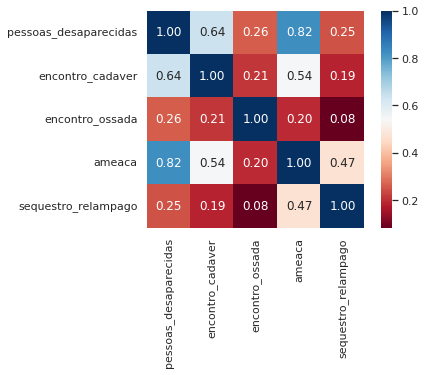

In [ ]:
corr2 = crimes_rio[['pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'ameaca',
                    'sequestro_relampago']].corr()

sns.heatmap(corr2, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True );

> E a Variável `ameaca` se destaca!

Trabalhando em cima dessa hipotese, executei novamente com o pacote numpy  uma matriz de correlação onde confirmamos que a variável `ameaca` possui uma forte correlação com `pessoas_desaparecidas`



In [ ]:
np.corrcoef([crimes_rio['ameaca'], crimes_rio['pessoas_desaparecidas']])


array([[1.        , 0.82466508],
       [0.82466508, 1.        ]])

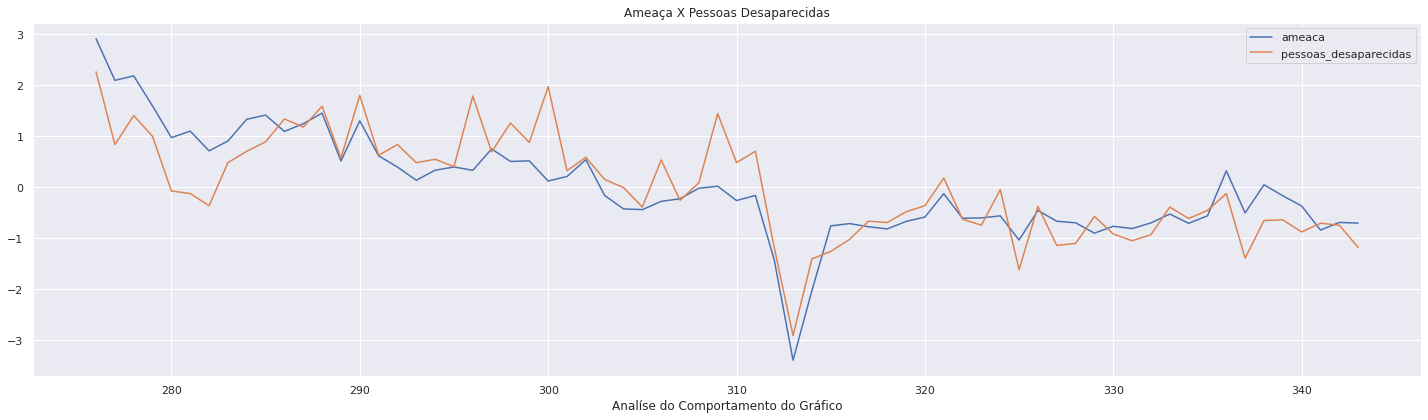

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

df_norm = (crimes_rio - crimes_rio.mean()) / crimes_rio.std()
sns.set()

df_norm.loc[:, 'ameaca'].plot(kind='line', ax=ax)

df_norm.loc[:, 'pessoas_desaparecidas'].plot(kind='line', ax=ax)
ax.set_title('Ameaça X Pessoas Desaparecidas')
ax.set_xlabel('Analíse do Comportamento do Gráfico')
plt.legend(loc = 'best')

plt.tight_layout();


No gráfico é possivel observar que possuem similaridade como esperado


E interessante verificar que os gráficos são muito parecidos ou seja:
> Das vezes que teve queda no gráfico de `ameaça` os de `pessoas desaparecidas` também

In [ ]:
# Vamos observar a média de casos de ameaça
mean_ameaca = crimes_rio['ameaca'].mean()
print(mean_ameaca)               
                

5511.985294117647


In [ ]:
# Vamos observar a média de casos de pessoas desaparecidas
mean_pessoas_desaparecidas = crimes_rio['pessoas_desaparecidas'].mean()
print(mean_pessoas_desaparecidas)

456.44117647058823


In [ ]:
# Agora vamos verificar o quanto de pessoas desarecidas em relação com a ameaça
percentual = (mean_pessoas_desaparecidas / mean_ameaca) * 100
percentual

8.280885236716781

> Então das ameaças registradas em média cerca de 8% se concretizam em desaparecimento, com isso concluimos que, a unica variável com uma correlação forte não apresenta uma forte casualidade

# Conclusão

In [ ]:
#Vamos observar a média das variaveis exploradas no periodo de 2014 a 2019
mean_dr = crimes_rio['apreensao_drogas'].mean()
print(f'A Média de Apreensão de drogas é: {mean_dr}')

A Média de Apreensão de drogas é: 2037.4705882352941


In [ ]:
#Vamos observar a média das variaveis exploradas no periodo de 2014 a 2019
mean_dint = crimes_rio['hom_por_interv_policial'].mean()
print(f'A Média de Homicidios por intervenção policial é: {mean_dint}') 

A Média de Homicidios por intervenção policial é: 89.17647058823529


In [ ]:
#Vamos observar a média das variaveis exploradas no periodo de 2014 a 2019
mean_pol = crimes_rio['pessoas_desaparecidas'].mean()
print(f'A Média de Pessoas desaparecidas é: {mean_pol}')

A Média de Pessoas desaparecidas é: 456.44117647058823


Com isso verificamos que existe pontos na qual analisamos que realmente são bastante preucupantes, como por exemplo o de homicidio por intervenção policial que só vem aumentando isso nos remete a entender que nas operações policiais estão sendo cada vez mais letais, para ambos os lados e só vem aumentando com o decorrer dos anos, 

E outro dado que frusta é o de pessoas desaparecidas   como vimos acima em média 456 casos ocorridos em um intervalo de 5 anos


Analisando os dados podemos entender de forma geral como a criminalidade age no Rio de Janeiro, e com isso as devidas medidas precisam ser tomadas pelos orgão competentes, e assim reduzir esse nível de criminalidade